<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FIT-HCMUS, VNU-HCM 
    <br>
    Introduction To Data Science 
    <br>
    Final project 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Data exploration 📌
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/processed/processed_fb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4934 non-null   object 
 1   Position       4934 non-null   object 
 2   PreferredFoot  4934 non-null   object 
 3   Season         4934 non-null   object 
 4   Age            4934 non-null   int64  
 5   Squad          4934 non-null   object 
 6   Country        4934 non-null   object 
 7   Comp           4934 non-null   object 
 8   LgRank         4934 non-null   int64  
 9   MP             4934 non-null   int64  
 10  Starts         4934 non-null   int64  
 11  Min            4934 non-null   int64  
 12  90s            4934 non-null   float64
 13  Gls            4934 non-null   int64  
 14  Ast            4934 non-null   int64  
 15  G+A            4934 non-null   int64  
 16  G-PK           4934 non-null   int64  
 17  PK             4934 non-null   int64  
 18  PKatt   

# Basic level

## What is the distribution of the data in each column?

## Categorial data

### Analyzing Positon

In [3]:
position = df[['Name', 'Position']].drop_duplicates()
position.describe()

,Name,Position
count,430,430
unique,430,4
top,William Saliba,DF
freq,1,172


- Có thể thấy, dữ liệu gồm có 430 cầu thủ.
- Hơn nữa, qua các mùa giải, vị trí của các cầu thủ trên sân là không thay đổi.

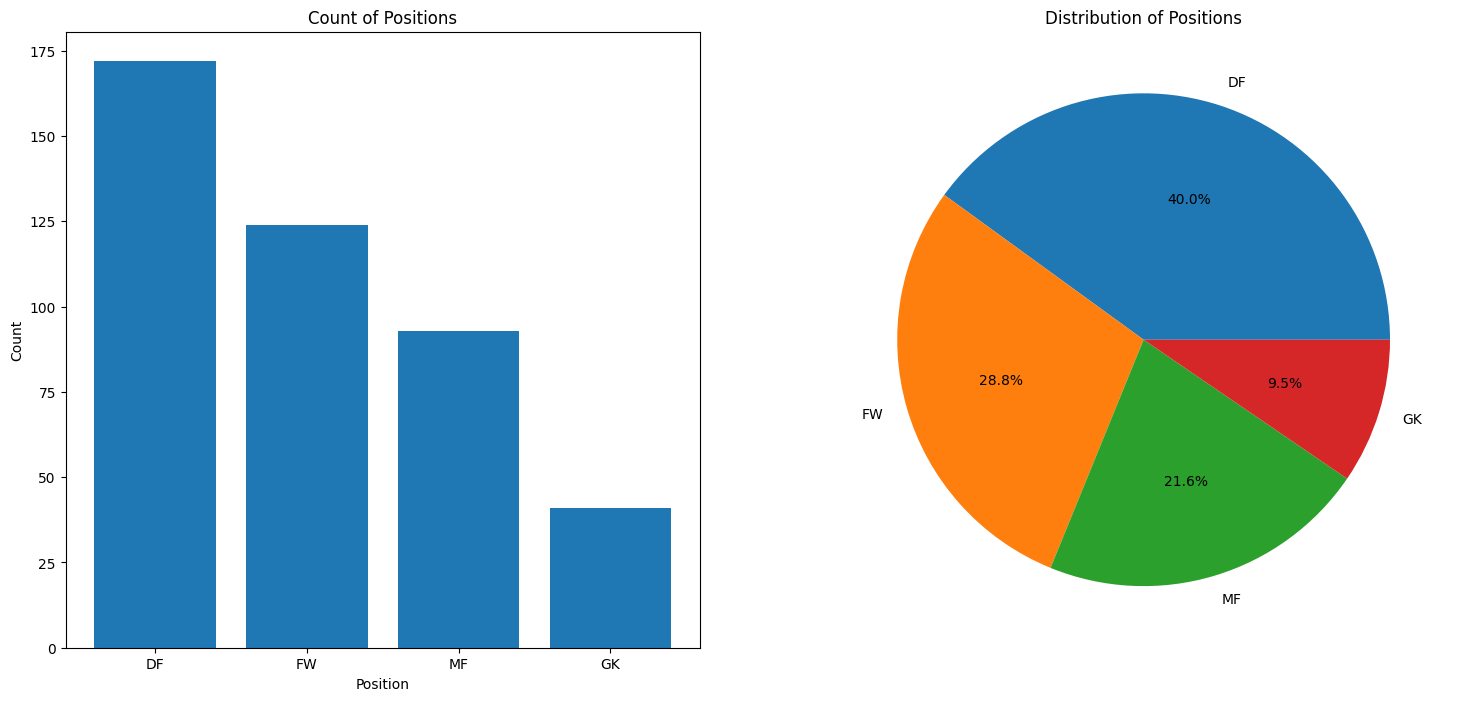

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
position_count = position['Position'].value_counts()
axes[0].bar(position_count.index, position_count.values)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Positions')

axes[1].pie(position_count.values, labels = position_count.index, autopct='%1.1f%%', startangle=0)
axes[1].set_title('Distribution of Positions')
plt.show()

- Như vậy có thể thấy:
    - Trong 430 cầu thủ, thì gồm có các vị trí DF (Hậu vệ), FW (Tiền đạo), MF (Tiền vệ), GK (Thủ môn).
    - Trong đó vị trí chiếm tỉ lệ nhiều nhất đó là DF (40%), tiếp theo là đến FW (28.8%) và MF (21.6%), vị trí Gk chiếm tỉ lệ ít nhất (9.5%) 

### Analyzing PreferredFoot

In [5]:
preferred_foot = df[['Name', 'PreferredFoot']].drop_duplicates()
preferred_foot.describe()

,Name,PreferredFoot
count,430,430
unique,430,3
top,William Saliba,Right
freq,1,314


- Có thể thấy, qua các mùa giải, chân thuận của các cầu thủ trên sân cũng không thay đổi.

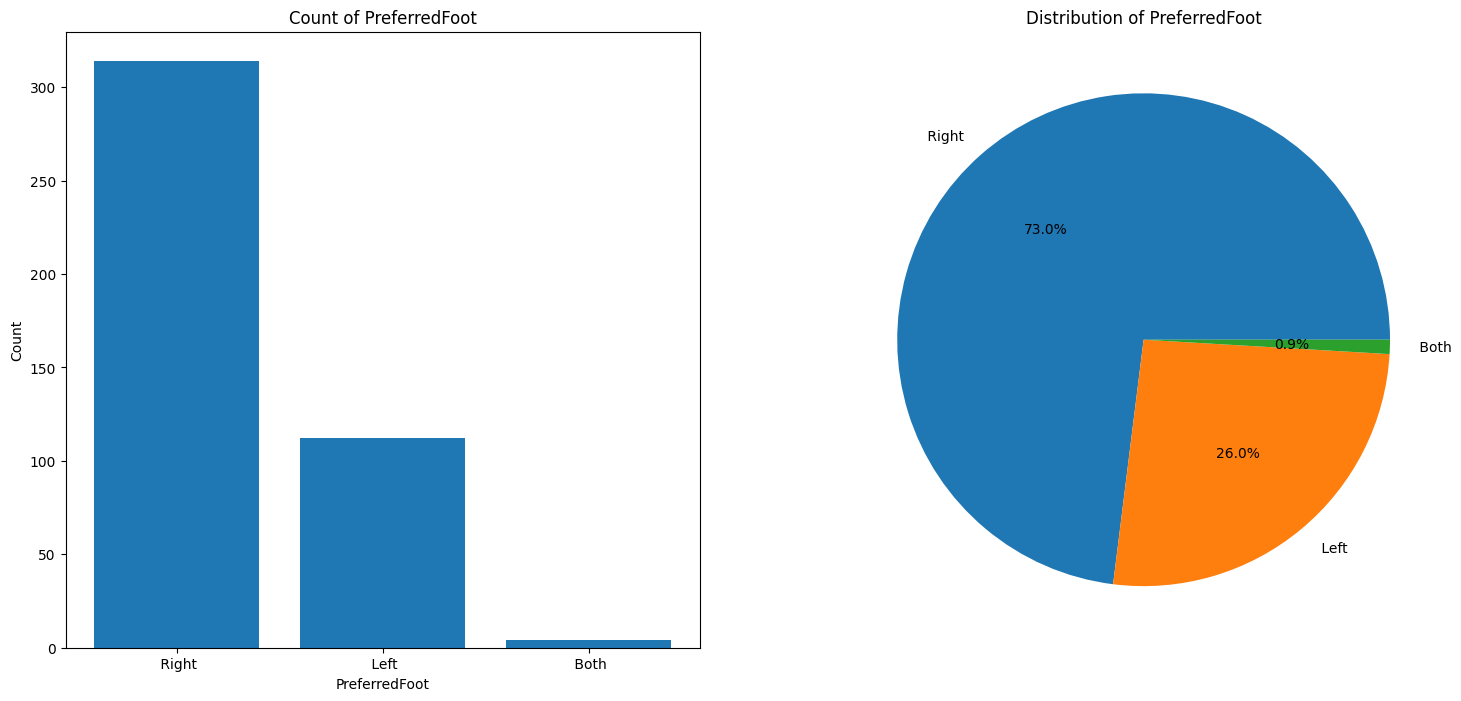

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
preferred_foot_count = preferred_foot['PreferredFoot'].value_counts()
axes[0].bar(preferred_foot_count.index, preferred_foot_count.values)
axes[0].set_xlabel('PreferredFoot')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of PreferredFoot')

axes[1].pie(preferred_foot_count.values, labels = preferred_foot_count.index, autopct='%1.1f%%', startangle=0)
axes[1].set_title('Distribution of PreferredFoot')
plt.show()

### Analyzing Season

In [7]:
df['Season'].describe()

count          4934
unique           10
top       2020-2021
freq            769
Name: Season, dtype: object

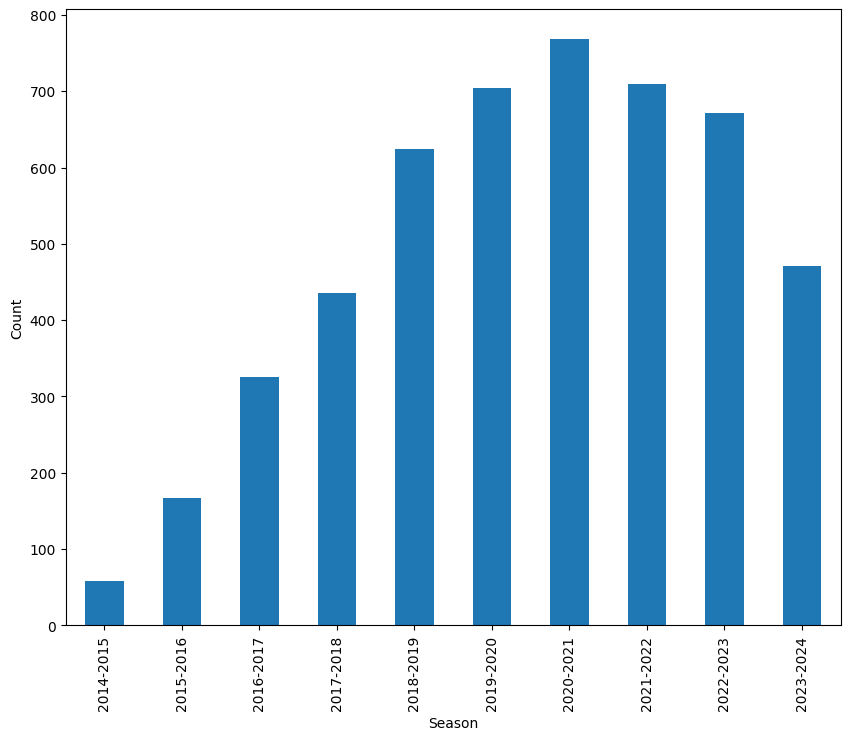

In [8]:
plt.figure(figsize=(10,8))
df['Season'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Count')
plt.show()

### Analyzing Squad

In [9]:
squad_df =  df[['Name', 'Squad']].drop_duplicates()['Squad']
squad_df.describe()

count                1398
unique                341
top       Nott'ham Forest
freq                   38
Name: Squad, dtype: object

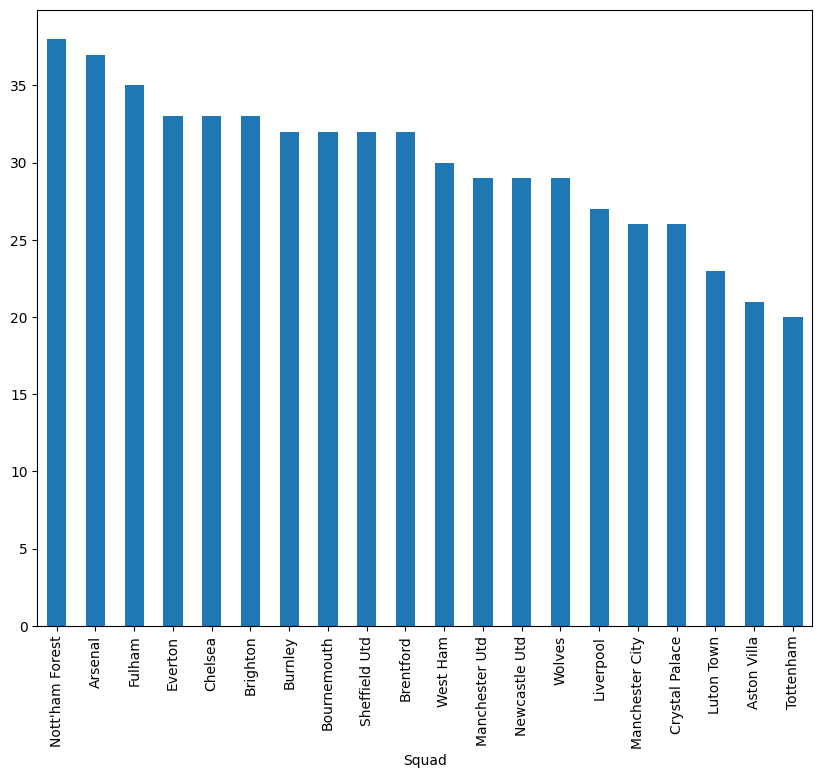

In [10]:
plt.figure(figsize=(10,8))
squad_df.value_counts()[:20].plot(kind='bar')
plt.show()

### Analyzing Country

In [11]:
df['Country'].describe()

count     4934
unique      33
top        ENG
freq      3339
Name: Country, dtype: object

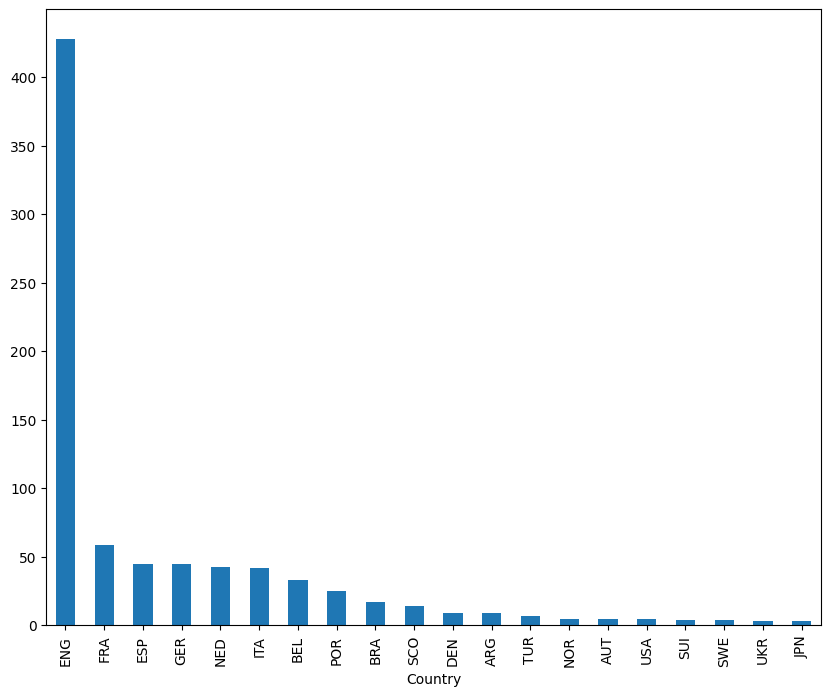

In [12]:
plt.figure(figsize=(10,8))
df[['Name', 'Country']].drop_duplicates()['Country'].value_counts()[:20].plot(kind='bar')
plt.show()

### Analyzing Comp

In [13]:
df['Comp'].describe()

count               4934
unique                50
top       Premier League
freq                2317
Name: Comp, dtype: object

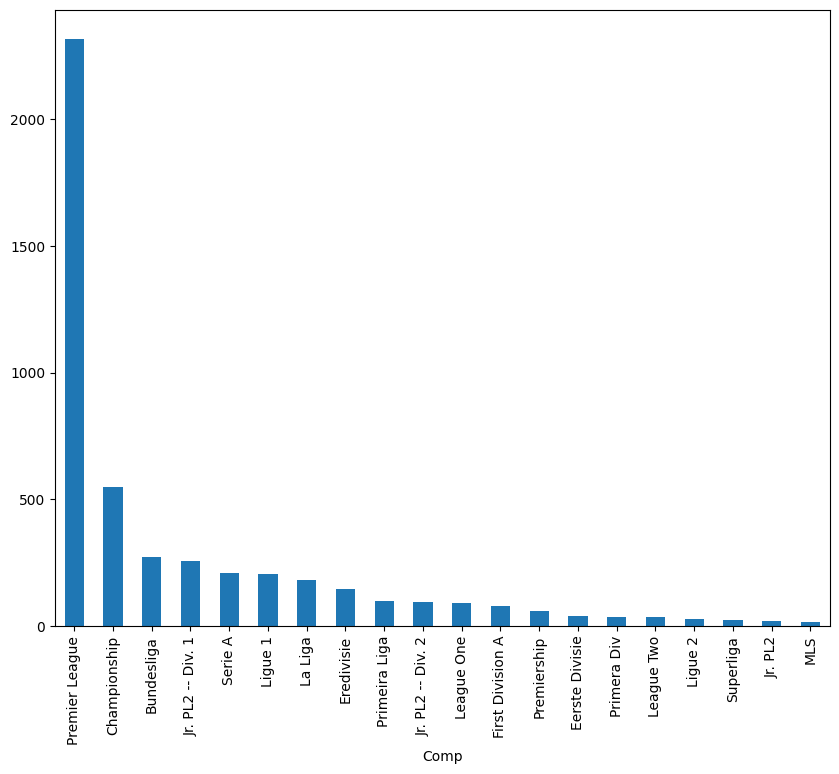

In [14]:
plt.figure(figsize=(10,8))
df['Comp'].value_counts()[:20].plot(kind='bar')
plt.show()

### Analyzing Injury

In [15]:
injury_df =  df[df['Injury'].notna()]['Injury']
injury_df.describe()

count                 2724
unique                 183
top       Hamstring injury
freq                   311
Name: Injury, dtype: object

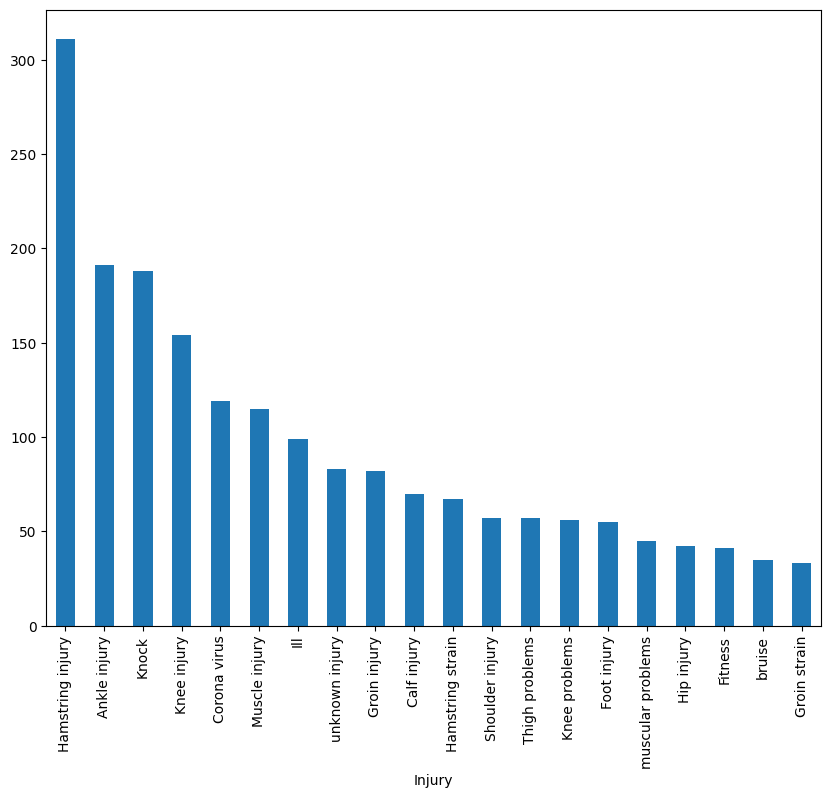

In [16]:
plt.figure(figsize=(10,8))
injury_df.value_counts()[:20].plot(kind='bar')
plt.show()

## Numerical data

# Making qeustion

## Question 1

**A possible question is:** How does overall player performance vary across different seasons?

**Answering this question will** help us to understand if there are seasonal trends in the performance of football players.

**How we answer this question**: Aggregate and analyze performance metrics (e.g., goals, assists) by season.

## Question 2

**A possible question is:** Are players more prone to injuries as they age?

**Answering this question will** explore if there's a relationship between a player's age and the likelihood of sustaining injuries.

**How we answer this question:** Analyze the frequency and types of injuries across different age groups.

## Question 3

**A possible question is:** How does the average duration of rest vary across different types of injuries?

**Answering this question will** help us understand the typical recovery time associated with each type of injury.

**How we answer this question:** Calculate the average duration of rest for each reported injury type.

## Question 4

**A possible question is:** How does the distribution of football players vary among countries in the dataset?

**Answering this question will** help us understand the spread of player representation across different countries.

**How we answer this question:** Examine the distribution of players among various countries.

## Question 5

**A possible question is:** What is the distribution of players across different positions in the dataset?

**Answering this question will** help us understand how players are spread across various playing positions.

**How we answer this question:** Create a breakdown of the number of players for each position.

## Question 6

**A possible question is:** What is the distribution of goals scored by players across different positions in the dataset?

**Answering this question will** help us understand how goals are spread across various playing positions.

**How we answer this question:** Create a breakdown of the number of goals scored by players for each position.

## Question 7

**A possible question is:** How does the number of injuries vary across player positions?

**Answering this question will** help us understand if there are differences in the injury rates based on player positions.

**How we answer this question:** Analyze and aggregate the number of injuries for each playing position.

## Question 8

**A possible question is:** How many times have the top 10 players with the most minutes played experienced injuries?

**Answering this question will** Understand the overall injury frequency for the highest-minutes players.

**How we answer this question:** Collect and calculate average the injury occurrences for each player in the top 10.